# Cross-validation for parameter tuning, model selection and feature selection
- Qual'è lo svantaggio dell'usare la procedura di train/test split per la valutazione di un modello
- Come riesce la procedura **K-fold cross-validation** a superare questa limitazione
- Come può essere usata la cross-validation per selezionare parametri modificabili, scegliere tra vari modelli e selezionare caratteristiche da usare
- Come è possibile migliorare la cross-validation

## Ripasso dei modelli di valutazione
**Obiettivo:** Trovare un modo per scegliere tra modelli di machine learning

**Idea 1:** Allenare e testare sugli stessi dati
- Ma massimizzare la precisione in allenamento porta ad avere modelli troppo complessi che causano overfit.

**Idea 2:** Train/test split
- Divide il dataset in due, cosicché il modello possa essere allenato e testato su dati diversi
- La precisione misurata durante il testing è una stima migliore di quella di allenamento
- Ma essa fornisce una stima molto variabile della precisione, in quanto essa può cambiare in base a quali dati sono nel set di testing

In [3]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
# read iris data
iris = load_iris()

# create features and responses
X = iris.data
y = iris.target

In [7]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.947368421053


**Domanda:** E se creassimo più sets e calcolassimo la precisione per ognuno e poi calcolassimo la media?

**Risposta:** Essenzialmente, la cross-validation funziona così.

## Passaggi per la K-fold cross-validation
1. Dividere il dataset in K parti uguali
2. usare la prima parte come testing set a l'unione delle altre come training set
3. Calcolare la precisione
4. Ripetere i passaggi 2 e 3 K volte, usando una parte diversa come testing ogni volta
5. Usare la media delle precisioni come stima della precisione out-of-sample

In [19]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

# stampa il contenuto di ogni set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{}   {}     {}'.format(iteration, data[0], data[1]))

Iteration                   Training set observations                   Testing set observations
1   [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]     [0 1 2 3 4]
2   [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]     [5 6 7 8 9]
3   [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]
4   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]
5   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]


- Il dataset contiene 25 campioni (0-24)
- 5-fold cross validation, quindi viene eseguita 5 volte
- Ad ogni iterazione, ogni campione può essere o nel training set o nel testing set, ma mai in entrambi
- Ogni campione finirà nel testing set una sola volta

## Comparare cross-validation con train/test split

Vantaggi della cross-validation:
- Stime per campioni out-of-sample più precise
- Uso più efficiente dei dati (ogni campione è usato sia nel training che nel testing)

Vantaggi del train/test split:
- È K volte più veloce della cross-validation
- Esaminare i risultati dettagliati è più semplice

### Raccomandazioni per l'uso della cross-validation
1. K può essere qualsiasi numero, ma K = 10 è generalmente consigliato
2. Per problemi di classificazione, lo **stratified sampling** è consigliato per creare i folds
    - Ogni classe di risposta può essere rappresentata con uguali proporzioni in ogni campo dei K
    - La funzione di sklearn <code>cross_val_score</code> lo fa di default

# Cross-validation example: parameter tuning
**Obiettivo:** Selezionare le migliori impostazioni per i parametri per KNN sul dataset Iris

In [20]:
from sklearn.cross_validation import cross_val_score

In [21]:
# 10-fold cross-val with KNN (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [22]:
# use average accuracy as an estimate out-of-sample accuracy
print(scores.mean())

0.966666666667


In [25]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


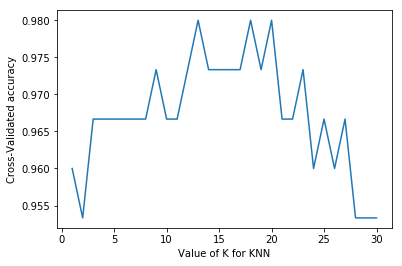

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x) versus the accuracy (y)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated accuracy')

# Cross-validation example: model selection
**Obiettivo:** Comparare il migliore modello KNN con la logistic regression sul dataset Iris

In [29]:
# 10-fold cross-validation with best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.98


In [30]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.953333333333


# Cross-validation example: feature selection
**Obiettivo:** Capire se la caratteristica Newspaper dovrebbe essere inclusa nel modello di linear regression sul dataset Advertising

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [33]:
# read the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [34]:
# create a python list of three feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# create X and y
X = data[feature_cols]
y = data['Sales']

In [38]:
# 10 fold-cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [44]:
# fix the sign of MSE scores
mse_scores = abs(scores)
print(mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [40]:
# convert MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [41]:
# calculate the average RMSE
print(rmse_scores.mean())

1.69135317081


In [43]:
# 10-fold cross-validation with two features
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print(np.sqrt(abs(cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error'))).mean())

1.67967484191


    NB: L'errore nei problemi non classificativi va MINIMIZZATO, quindi, siccome il tasso di errore è sceso, rimuovere i giornali è una scelta migliore rispetto all'averli nel modello.

# Migliorare la cross-validation
### Cross-validation ripetuta
- Ripetere la cross-validation più volte (con random split dei dati diversi) e calcolare la media dei risultati
- Ottenere stime più affidabili riducendo la varianza associata ad una sola esecuzione della cross-validation

### Creare un set di "hold-out"
- "Hold out" una porzione dei dati prima di iniziare la costruzione del modello
- Trovare il miglior modello usando la cross-validation sui dati rimanenti, testandolo sul set di hold-out
- Stime più affidabili poiché un set hold-out è **veramente** out of sample.

### Feature engineering e selezione tra le iterazioni di cross-validation
- Normalmente, queste operazioni vengono fatte prima della cross validation
- Invece, eseguire tutte queste operazioni tra un'iterazione e l'altra
- Stime più affidabili poiché simula meglio l'applicazione del modello ad un campione out of sample